# Objective

Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

# Dataset details

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import seaborn as sns

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [4]:
df = pd.read_csv("telecommunications_churn.csv")
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# Exploratory Data Analysis (EDA) & Cleaning

In [5]:
#Checking size of the dataset
df.shape

(3333, 19)

In [6]:
#Checking First Few rows
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [7]:
#Checking the data types and nullability of columns
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

As shown above, the data set contains 3333 observations and 19 columns. Apparently, there are no null values on the data set.

In [8]:
#Checking the summary of the dataset
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


After viewing the basic statistical details of the data. We can observe that:

1. The average number of minutes a person is talking on the phone in day, evening and night is almost same.
2. The average number of calls made during the day, evening and night is almost same.
3. Again, the day charges are higher as compared to the evening and the night charges.
4. We can draw a conclusion here that Day, Evening and night charges are in the ratio 4:2:1.

# Checking Duplicated values

In [9]:
df[df.duplicated()]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


As we can see above there are no duplicate values are present in the given dataset.

# Data Visualization

In [44]:
import seaborn as sns
sns.scatterplot(df.day_charge, df.total_charge, hue=df.churn)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
sns.scatterplot(df.evening_charge, df.total_charge, hue=df.churn)

In [ ]:
sns.scatterplot(df.night_charge, df.total_charge, hue=df.churn)

By looking at the above plot we can observe that:

1. Day charges are highly postively related to the total charge.
2. Evening charges are less related to the total charge.
3. Night charges are the least which is related to the total charge.

# Churn Vs Non-Churn 

In [ ]:
df.churn.value_counts().plot(kind="pie",autopct="%0.2f")

so, according to the above pie chart:
1. 85.51% are number of NO (Customer won't Churn)
2. 14.49% are number of YES (Customer will Churn)

In [ ]:
print(df['churn'].value_counts())
sns.countplot(df['churn'])

The above bar plot shows the percentage of observations that correspond to each class of the response variable: no(0) and yes(1). This is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class more than 83%. When modeling, this imbalance will lead to a large number of false negatives.

By this we can also conclude that:

1. Churn vs Non-churn customers ratio is 1:6
2. Churn minority class - 483 customers
3. Non-churn - majority class - 2850 customers

In [ ]:
sns.barplot(df.churn, df.account_length)

The above bar plot clearly shows that the account lenght has no effect on churning rate of customer. We may condisder dropping this feature from the data set in future.

In [ ]:
sns.countplot(df.voice_mail_plan, hue='churn', data=df)

We can see that customer who does not have voice mail plan are the highest churner. Also, we can see below that how many customers are churners and non-churners.

In [ ]:
df[(df.voice_mail_plan == 0) & (df.churn == 1)]

In [ ]:
# those who have taken voice mail plan and are churning are less no of customers
df[(df.voice_mail_plan == 1) & (df.churn == 1)]

In [ ]:
sns.barplot(df.churn, df.voice_mail_messages)

By looking at the above plot. we can observe churn customers have less number of Voice Mail Messages

In [ ]:
df[(df.voice_mail_messages > 0)&(df.churn == 1)]

In [ ]:
sns.countplot(df.international_plan, hue='churn', data=df)

By looking at the above plot, we observe that those who have no international plan are high churners.

In [ ]:
df[(df.international_plan== 0) & (df.international_calls!=0)]

From the above data it is very obvious that there are 2992 customers with no international plan but have international calls.

In [ ]:
df.churn.value_counts()

In [ ]:
df[(df.international_plan == 0)&(df.international_calls != 0)&(df.churn == 1)]

We can write a conclusion that, out of 483 churn customers 346 have no international plan but have international calls.

In [ ]:
df_domestic = df.copy()
df_domestic['domestic_charge'] = df_domestic['day_charge']+df_domestic['evening_charge']+df_domestic['night_charge']
df_domestic.head()

In [ ]:
sns.scatterplot(df_domestic.domestic_charge, df_domestic.total_charge, hue = df_domestic.churn)

By looking at the above scatter plot we can clearly see that:

1. Domestic charge has positive linear relationship with the total charge
2. Customers having high domestic charge (total charge) are mostly churning
3. Only few customers with less total charge have churned


In [ ]:
sns.scatterplot(df_domestic.international_charge, df_domestic.total_charge, hue = df_domestic.churn)

In [ ]:
sns.barplot(df_domestic.international_charge, df_domestic.total_charge)

In [ ]:
sns.barplot(df_domestic.churn, df_domestic.international_charge)

By looking at the above scatterplot and bar plot we can see that there is no linear relationship between international charge and total charge as well as International charge is not affecting the churning rate as it is approximately same for both churn and non-churn customers.

# Univariate Analysis

In [ ]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], palette='mako',edgecolor='black')
    plt.xlabel(i, fontsize=10)
    plt.show()

In [ ]:
sns.catplot(x='churn', y = 'day_mins', col='customer_service_calls',
           data=df[df['customer_service_calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

Starting with 4 calls, total day minutes may no longer be the main factor for customer churn. day minutes have also reduced by increase in customer service calls.

In [ ]:
sns.catplot(x='churn', y = 'night_mins', col='customer_service_calls',
           data=df[df['customer_service_calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

Night minutes is almost equal while increase in customer service call. churn is also same pattern as not churn¶

In [ ]:
sns.catplot(x='churn', y = 'evening_mins', col='customer_service_calls',
           data=df[df['customer_service_calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

Starting with 4 calls, total evening minutes may increased of not churn

In [ ]:
sns.catplot(x='churn', y = 'international_mins', col='customer_service_calls',
           data=df[df['customer_service_calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

With increase in customer call, total international minutes may be the good factor for customer churn

# Bivariate Analysis

In [ ]:
sns.pairplot(df)

# Label Encoder

In [ ]:
obj_col = df.loc[:,df.dtypes==float].columns

In [ ]:
for i in obj_col:
    u = df[i].unique()
    
    print("{} || {} \n".format(i,u))

In [ ]:
for i in obj_col:
    v = df[i].value_counts()
    
    print("{} \n {} \n".format(i,v))

# Features Selection

1) Correlation

2) RFE model

3) Decision Tree features importence

4) Univarient Selection

In [ ]:
df.corr()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt="0.2g")

In [ ]:
df.corr().sort_values("churn")["churn"]

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,12))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
X = df.drop("churn",axis=1)
y = df["churn"]

In [ ]:
#Univarient Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions


test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, y)

In [ ]:
set_printoptions(precision=3)
print(fit.scores_)

In [ ]:
fit.get_feature_names_out()

In [ ]:
col = X.columns

In [ ]:
data = pd.DataFrame({"Column":col,"Value":fit.scores_})
data.sort_values("Value")

In [ ]:
#RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select = 8)
fit = rfe.fit(X, y)

In [ ]:
fit.support_

In [ ]:
fit.ranking_

In [ ]:
data = pd.DataFrame({"Column":col,"Value":fit.ranking_})
data.sort_values("Value")

In [ ]:
 # Decision Tree Feature importence
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

In [ ]:
model.feature_importances_

In [ ]:
data = pd.DataFrame({"Column":col,"Value":model.feature_importances_})
data.sort_values("Value")

We will drop from these features in Feature Engineering

# Detecting Outliers

1. Plotted outliers for all features using boxplot
2. If outliers were very high in number then used z-scores also to plot outliers
3.Then took the intersection (common) of both boxplot and z-scores to get outliers
4. Checked outliers for each columns.
5. Decided to keep the outliers as it was not confirmed whether they were measurement or data entry errors.
6. Also deleting or changing outliers to their 10th or 90th percentile may lead to loss of information so, decided to not change the outliers

In [ ]:
plt.boxplot(df)

In [ ]:
def calculate_zscores(col_name):
    UL = np.round(df[col_name].mean() + 3*(df[col_name].std()),3)
    LL = np.round(df[col_name].mean() - 3*(df[col_name].std()),3)
    return (LL,UL)

def calculate_outliers_boxplot(colName):
    q1,q3 = np.percentile(df[colName],[25,75])
    iqr = q3-q1
    LB = np.round(q1 - 1.5*(iqr),3)
    UB = np.round(q3 + 1.5*(iqr),3)
    return (LB,UB)

In [ ]:
plt.figure(figsize=(10,10))
Account_length = plt.boxplot(df['account_length'])

In [ ]:
outlier_points = Account_length['fliers'][0].get_data()[1]
outliers = outlier_points.tolist()
print(len(outliers))
sorted(outliers)

In [ ]:
# checking outliers for upper bound
df[df['account_length'] > 224].sort_values(by='account_length')

In [ ]:
plt.figure(figsize=(8,8))
account_length = plt.boxplot(df['voice_mail_messages'])

In [ ]:
plt.figure(figsize=(8,8))
day_mins = plt.boxplot(df['day_mins'])

In [ ]:
outlier_points_dm = day_mins["fliers"][0].get_data()[1]
outlier_dm = outlier_points_dm.tolist()
print(len(outlier_dm))
sorted(outlier_dm)

In [ ]:
plt.figure(figsize=(8,8))
evening_mins = plt.boxplot(df['evening_mins'])

In [ ]:
outlier_evening_mins = evening_mins["fliers"][0].get_data()[1]
outlier_em = outlier_evening_mins.tolist()
print(len(outlier_em))
sorted(outlier_em)

In [ ]:
plt.figure(figsize=(8,8))
night_mins = plt.boxplot(df['night_mins'])

In [ ]:
outlier_points_nm = night_mins["fliers"][0].get_data()[1]
outlier_nm = outlier_points_nm.tolist()
print(len(outlier_nm))
sorted(outlier_nm)

In [ ]:
# checking outliers for lower bound
# here 23.2 is an outlier but no of evening calls is also less
# data appears to be accurate
df[df['night_mins'] < 47].sort_values(by='night_mins').iloc[:,5:]

In [ ]:
# checking outliers for upper bound
df[df['night_mins'] >364].sort_values(by='night_mins').iloc[:,5:]

In [ ]:
plt.figure(figsize=(8,8))
international_mins = plt.boxplot(df['international_mins'])

In [ ]:
outlier_points_im = international_mins["fliers"][0].get_data()[1]
outlier_im = outlier_points_im.tolist()
print(len(outlier_im))
sorted(outlier_im)

In [ ]:
plt.figure(figsize=(8,8))
customer_service_calls = plt.boxplot(df['customer_service_calls'])

In [ ]:
outlier_points_csc = customer_service_calls["fliers"][0].get_data()[1]
outlier_csc = outlier_points_csc.tolist()
print(len(outlier_csc))
sorted(outlier_csc)

In [ ]:
# this will give dataframe which will be easier to merge with the z-scores dataframe
import numpy as np
LB, UB = calculate_outliers_boxplot('customer_service_calls')
print(LB,UB)
outlier_wrt_boxplot_csc = df[(df['customer_service_calls']> UB) | (df['customer_service_calls']< LB )]
print(outlier_wrt_boxplot_csc.shape)
outlier_wrt_boxplot_csc

In [ ]:
# we were getting lot of outliers using boxplot so using z-scores for outliers
LL,UL = calculate_zscores('customer_service_calls')
print(LL, UL)
outlier_wrt_std_dev_csc = df[(df['customer_service_calls']> UL) | (df['customer_service_calls']< LL )]
print(outlier_wrt_std_dev_csc.shape)
outlier_wrt_std_dev_csc

In [ ]:
# merging zscores and boxplot outliers
outlier_merged_csc = pd.merge(outlier_wrt_boxplot_csc, outlier_wrt_std_dev_csc, left_index=True, right_index=True)
print(outlier_merged_csc.shape)
outlier_merged_csc.iloc[:,7:19].sort_values(by='customer_service_calls_x')

In [ ]:
plt.figure(figsize=(8,8))
r_day_calls = plt.boxplot(df['day_calls'])

In [ ]:
outlier_points_dc = r_day_calls["fliers"][0].get_data()[1]
outlier_dc = outlier_points_dc.tolist()
print(len(outlier_dc))
sorted(outlier_dc)

In [ ]:
# checking for lower bound outliers
df[df['day_calls'] < 40].sort_values(by='day_calls').iloc[:,9:]

In [ ]:
plt.figure(figsize=(8,8))
day_charge = plt.boxplot(df['day_charge'])

In [ ]:
outlier_points_dc = day_charge["fliers"][0].get_data()[1]
outlier_dc = outlier_points_dc.tolist()
print(len(outlier_dc))
sorted(outlier_dc)

In [ ]:
plt.figure(figsize=(8,8))
evening_calls = plt.boxplot(df['evening_calls'])


In [ ]:
outlier_points_ec = evening_calls["fliers"][0].get_data()[1]
outlier_ec = outlier_points_ec.tolist()
print(len(outlier_ec))
sorted(outlier_ec)

In [ ]:
df[df['evening_calls'] < 42].sort_values(by='evening_calls').iloc[:,11:]

In [ ]:
plt.figure(figsize=(8,8))
evening_charge = plt.boxplot(df['evening_charge'])


In [ ]:
outlier_points_echarge = evening_charge["fliers"][0].get_data()[1]
outlier_echarge = outlier_points_echarge.tolist()
print(len(outlier_echarge))
sorted(outlier_echarge)

In [ ]:
plt.figure(figsize=(8,8))
night_calls = plt.boxplot(df['night_calls'])

In [ ]:
outlier_points_nc = night_calls["fliers"][0].get_data()[1]
outlier_nc = outlier_points_nc.tolist()
print(len(outlier_nc))
sorted(outlier_nc)


In [ ]:
plt.figure(figsize=(8,8))
night_charge = plt.boxplot(df['night_charge'])

In [ ]:
outlier_points_ncharge = night_charge["fliers"][0].get_data()[1]
outlier_ncharge = outlier_points_ncharge.tolist()
print(len(outlier_ncharge))
sorted(outlier_ncharge)

In [ ]:
plt.figure(figsize=(8,8))
international_calls = plt.boxplot(df['international_calls'])


In [ ]:
outlier_points_icalls = international_calls["fliers"][0].get_data()[1]
outlier_icalls = outlier_points_icalls.tolist()
print(len(outlier_icalls))
sorted(outlier_icalls)

In [ ]:
# using boxplot
LB, UB = calculate_outliers_boxplot('international_calls')
print(LB,UB)
outlier_wrt_boxplot_ic_UB = df[df['international_calls']> UB]
print(outlier_wrt_boxplot_ic_UB.shape)
outlier_wrt_boxplot_ic_UB.head()

In [ ]:
# using z-scores
LL,UL = calculate_zscores('international_calls')
print(LL, UL)
outlier_wrt_std_dev_ic_UL = df[df['international_calls']> UL ]
print(outlier_wrt_std_dev_ic_UL.shape)
outlier_wrt_std_dev_ic_UL.head(5)


In [ ]:
# merging outlier code for zscores and boxplot
outlier_ic_UB = pd.merge(outlier_wrt_boxplot_ic_UB, outlier_wrt_std_dev_ic_UL, left_index=True, right_index=True)
print(outlier_ic_UB.shape)
outlier_ic_UB.iloc[:,12:19].sort_values(by='international_calls_x')

# Feature Importance

# Mutual Information — Analysis of linear and nonlinear relationships

Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

The Scikit-Learn library has implemented mutual information in the metrics package. The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [ ]:
import sklearn
from sklearn.metrics.cluster import mutual_info_score

In [ ]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.churn)

# select categorial variables excluding the response variable 
categorical_variables = df.drop('churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)


In [ ]:
feature_importance.plot(kind='barh')

Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target.

As shown above, Voice Mail Plan and international calls have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

The mutual information extends the notion of correlation to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

# Feature Engineering

# Feature Importance - Correlation Matrix / Mutual Information Gain / Anova Test

# Correlation Matrix

We are often interested in understanding the relationship between two variables.

1. -1 indicates a perfectly negative linear correlation between two variables.
2. 0 indicates no linear correlation between two variables.
3. 1 indicates a perfectly positive linear correlation between two variables.

The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(17,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmax=1, vmin=-1, fmt='.2f')

By looking at the above Correlation Matrix, We can observe that International Plan, Total Charge, and Customer Service call are the important features.

# Mutual Information Gain

Information Gain measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable. A larger information gain suggests a lower entropy group or groups of samples, and hence less surprise. Lower probability events have more information, higher probability events have less information. Entropy quantifies how much information there is in a random variable, or more specifically its probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.

In [ ]:
x = df.iloc[:,0:18]
x.head()

In [ ]:
y = df.iloc[:,-1]
y.head()

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
importances = mutual_info_classif(x,y)
importances

In [ ]:
importance_list = pd.Series(importances)
feature_name_list = df.columns
print(feature_name_list)

In [ ]:
df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = feature_name_list
df_feature_importance['IG'] = importance_list
df_feature_importance.sort_values(by='IG', ascending=False)

In [ ]:
sns.barplot(x='IG', y='Feature', data=df_feature_importance, color='teal')

1. ('total_charge', 'customer_service_calls', 'international_plan') == important features
2. ('day_mins' & 'day_charge') == drop due to multicollinearity

3. ('total_charge','customer_service_calls', 'international_plan', 'international_charge') == final important features

# Anova Test

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as

H0: Means of all groups are equal.

H1: At least one mean of the groups are different.



In [ ]:
x = df.iloc[:,0:18]
print(x.shape)
y = df['churn']
print(y.shape)

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=18)
x_selected = fs.fit(x,y)

In [ ]:
print("P values")
np.round(x_selected.pvalues_,3)

In [ ]:
print('f1 scores')
np.round(x_selected.scores_,3)

In [ ]:
import math

def list_ceil(x):
    return [math.ceil(i) for i in x]
list_ceil(x_selected.scores_)

In [ ]:
#creating dataframe of f1scores & pvalues

df_anova = pd.DataFrame()
list_pvalues = pd.Series(np.round(x_selected.pvalues_,3))
list_fscores = list_ceil(x_selected.scores_)
list_cols    = x.columns
df_anova['Features'] = list_cols
df_anova['F scores'] = list_fscores
df_anova['Pvalues']  = list_pvalues
df_anova.sort_values(by='F scores', ascending=False)

In [ ]:
sns.barplot(x='F scores', y='Features', data=df_anova, color='teal')

The result is very significant that after the ANOVA Test. We find out that Iinternational Plan', Total Charge and Customer Service Calls are the important features.

# Transformations

Data transformation is the process of converting raw data into a a format or structure that would be more suitable for the model or algorithm and also data discovery in general. It is an essential step in the feature engineering that facilitates discovering insights.

In [ ]:
df.international_calls.hist()
print("Skewness = ",np.round(df.international_calls.skew(),3))
Skewness =  1.321

In [ ]:
df.customer_service_calls.hist()
print("Skewness = ",np.round(df.customer_service_calls.skew(),3))


In [ ]:
df.voice_mail_messages.hist()
print('Skewness = ',df.voice_mail_messages.skew())

Transformations are required only for continuous variables and continuous variables are all normally distributed. However, we will not do any log or sqrt transformation as these are discrete variables.

As we see in the above histograms it is very obvious that skewness is high which is above 1.

# Square Root Transformation: Transform the response variable from y to √y.

In [ ]:
#create log-transformed data
df_log = np.sqrt(df)

In [ ]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='blue')
axs[1].hist(df_log, edgecolor='blue')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

# Cube Root Transformation: Transform the response variable from y to y1/3.

In [ ]:
#create log-transformed data
df_log = np.cbrt(df)

In [ ]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='blue')
axs[1].hist(df_log, edgecolor='blue')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

# Box Cox transformation in Python

In [ ]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'B_Boxcox', 
              boxcox(df.iloc[:, 0])[0])

In [ ]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='blue')
axs[1].hist(df_log, edgecolor='blue')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Boxcox data')

# Multicollinearity - Variance Inflation Factor (VIF)

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [ ]:
X  = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin=-1, fmt='.2f')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = calc_vif(X)
df_vif.sort_values(by='VIF', ascending=False)

In [ ]:
#deleted these variables as they are 100% related(from corelation matrix) to international_mins, night_mins,evening_mins,day_mins respectively
df.drop(labels=['international_charge','night_charge','evening_charge','day_charge','B_Boxcox'], axis=1, inplace=True)
df

In [ ]:
# again plotting vif for remaining 15 features
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_1 = calc_vif(X_vif_1)
df_vif_1.sort_values(by='VIF', ascending=False)

In [ ]:
#deleting day_mins as it has 88% correlation with total charge
df.drop(labels=['day_mins'], axis=1, inplace=True)
df

In [ ]:
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_2 = calc_vif(X_vif_1)
df_vif_2.sort_values(by='VIF', ascending=False)

In [ ]:
# stopping here
# also deleting more features can cause loss of information
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_3 = calc_vif(X_vif_1)
df_vif_3.sort_values(by='VIF', ascending=False)

In [ ]:
df

# Setting a Baseline

In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model. In this classification problem, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

# Splitting the data in training and testing sets

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. The training set is used by the machine learning algorithm to build the model. The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

First, we create a variable X to store the independent attributes of the dataset. Additionally, we create a variable y to store only the target variable (Churn).

Now, we can use the train_test_split function from the sklearn.model_selection package to create both the training and testing sets.

# Without Scaling

In [11]:
X  = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

(3333, 18)
(3333, 1)


In [12]:
from sklearn.model_selection import train_test_split, cross_validate

df_raw = pd.DataFrame(columns=[['Models','Accuracy_tr','Accuracy_ts','F1-score_1']])
tr_acc_list = []
ts_acc_list = []
ts_f1_list  = []

#on raw data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 18)
(667, 18)
(2666, 1)
(667, 1)


# After going through the above EDA we will develop some predictive models and compare them.

# Model Evaluation

In [13]:
import math
import scipy.stats as stats

In [14]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,  confusion_matrix, f1_score, make_scorer, roc_auc_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Logistic Regression

In [15]:
print('\n\nLogistic Regression')
lr_model = LogisticRegression(random_state= 11)
lr_model.fit(x_train,y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr  = lr_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_lr),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr),2))
print(classification_report(y_test,y_pred_test_lr))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_lr),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr),2))

cl_report_lr = classification_report(y_test,y_pred_test_lr, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_lr),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_lr),2)) 
ts_f1_list.append(np.round(cl_report_lr['1']['f1-score'],2))




Logistic Regression
Training Accuracy =  0.85
Testing Accuracy =  0.85
[[562   8]
 [ 93   4]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       570
           1       0.33      0.04      0.07        97

    accuracy                           0.85       667
   macro avg       0.60      0.51      0.50       667
weighted avg       0.78      0.85      0.79       667

Training ROC AUC score=  0.53
Testing ROC AUC score=  0.51


AxesSubplot(0.125,0.11;0.775x0.77)


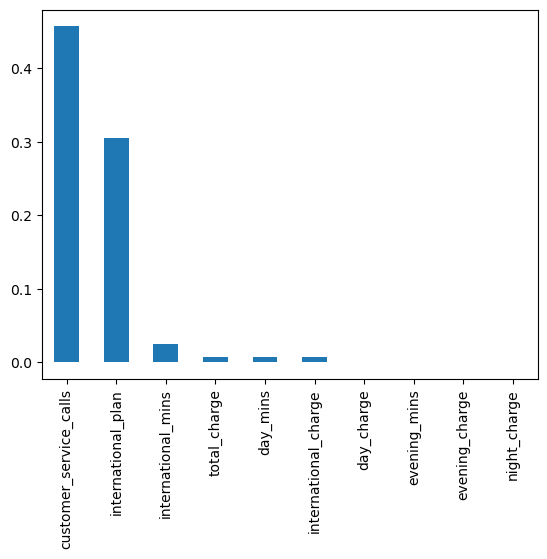

In [16]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


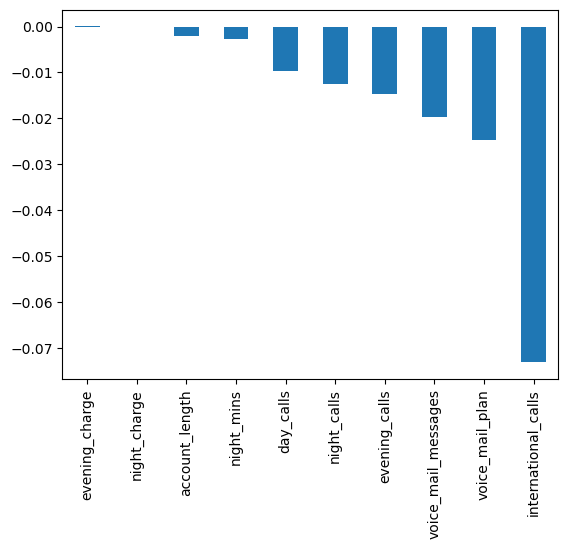

In [17]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

# Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC

In [19]:
print('\n\nSupport Vector Machine')
svm_model = SVC(random_state= 11)
svm_model.fit(x_train,y_train)
y_pred_train_svm = svm_model.predict(x_train)
y_pred_test_svm  = svm_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_svm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_svm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_svm),2))
print(classification_report(y_test,y_pred_test_svm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_svm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_svm),2))

cl_report_svm = classification_report(y_test,y_pred_test_svm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_svm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_svm),2)) 
ts_f1_list.append(np.round(cl_report_svm['1']['f1-score'],2))



Support Vector Machine
Training Accuracy =  0.86
Testing Accuracy =  0.85
[[570   0]
 [ 97   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667

Training ROC AUC score=  0.5
Testing ROC AUC score=  0.5


In [20]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred_test_svm)) 

[[570   0]
 [ 97   0]]


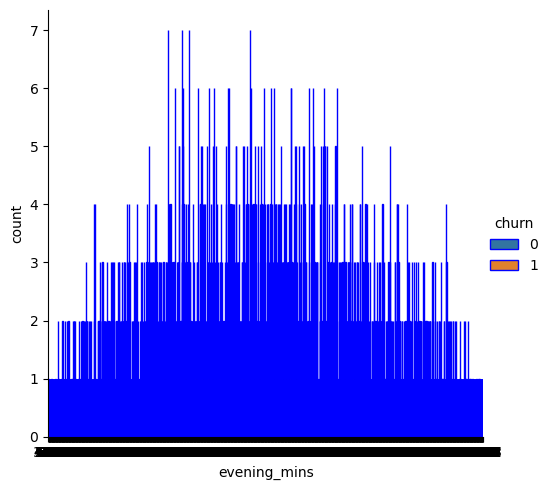

In [21]:
ax1 = sns.catplot(x="evening_mins", kind="count", hue="churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x), edgecolor='blue')


# Random Forest

In [22]:
print('\n\nRandom Forest')
rf_model = RandomForestClassifier(n_estimators=100, random_state=99, max_depth=3)
rf_model.fit(x_train,y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf  = rf_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_rf),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf),2))
print(classification_report(y_test,y_pred_test_rf))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_rf),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf),2))

cl_report_rf = classification_report(y_test,y_pred_test_rf, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_rf),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_rf),2)) 
ts_f1_list.append(np.round(cl_report_rf['1']['f1-score'],2))




Random Forest
Training Accuracy =  0.91
Testing Accuracy =  0.9
[[570   0]
 [ 65  32]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       570
           1       1.00      0.33      0.50        97

    accuracy                           0.90       667
   macro avg       0.95      0.66      0.72       667
weighted avg       0.91      0.90      0.88       667

Training ROC AUC score=  0.68
Testing ROC AUC score=  0.66


<AxesSubplot:>

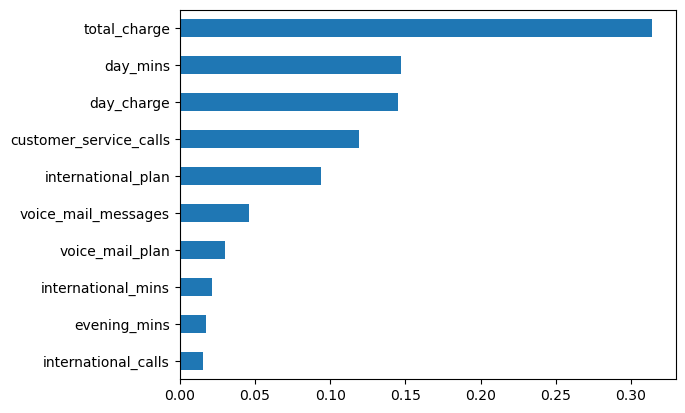

In [23]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Gaussian NB

In [24]:
print('\n\nGaussian NB')
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_train_gnb = gnb_model.predict(x_train)
y_pred_test_gnb  = gnb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gnb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb),2))
print(classification_report(y_test,y_pred_test_gnb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gnb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test, y_pred_test_gnb),2))

cl_report_gnb = classification_report(y_test,y_pred_test_gnb, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_gnb),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test, y_pred_test_gnb),2)) 
ts_f1_list.append(np.round(cl_report_gnb['1']['f1-score'],2))



Gaussian NB
Training Accuracy =  0.88
Testing Accuracy =  0.86
[[521  49]
 [ 46  51]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       570
           1       0.51      0.53      0.52        97

    accuracy                           0.86       667
   macro avg       0.71      0.72      0.72       667
weighted avg       0.86      0.86      0.86       667

Training ROC AUC score=  0.79
Testing ROC AUC score=  0.72


# Decision Tree

In [25]:
print('\n\nDecision Tree')
dt_model = DecisionTreeClassifier(random_state= 117)
dt_model.fit(x_train,y_train)
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt  = dt_model.predict(x_test)
print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_dt),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt),2))
print(classification_report(y_test,y_pred_test_dt))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_dt),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt),2))

cl_report_dt = classification_report(y_test,y_pred_test_dt, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_dt),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_dt),2)) 
ts_f1_list.append(np.round(cl_report_dt['1']['f1-score'],2))





Decision Tree
Training Accuracy =  1.0
Testing Accuracy =  0.96
[[554  16]
 [ 14  83]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       570
           1       0.84      0.86      0.85        97

    accuracy                           0.96       667
   macro avg       0.91      0.91      0.91       667
weighted avg       0.96      0.96      0.96       667

Training ROC AUC score=  1.0
Testing ROC AUC score=  0.91


# XGBoost Classifier

In [26]:
print('\n\nXgboost')
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train_xgb  = xgb_model.predict(x_train)
y_pred_test_xgb   = xgb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_xgb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb),2))
print(classification_report(y_test,y_pred_test_xgb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_xgb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb),2))

cl_report_xgb = classification_report(y_test,y_pred_test_xgb, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_xgb),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_xgb),2)) 
ts_f1_list.append(np.round(cl_report_xgb['1']['f1-score'],2))





Xgboost
Training Accuracy =  1.0
Testing Accuracy =  0.98
[[570   0]
 [ 16  81]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       570
           1       1.00      0.84      0.91        97

    accuracy                           0.98       667
   macro avg       0.99      0.92      0.95       667
weighted avg       0.98      0.98      0.98       667

Training ROC AUC score=  1.0
Testing ROC AUC score=  0.92


In [27]:
print('\n\nRaw Data Score')
model_string =['LR', 'NB', 'DT','RF','XGBoost', 'SVM'] 
df_raw['Models'] = model_string
df_raw['Accuracy_tr'] = tr_acc_list
df_raw['Accuracy_ts'] = ts_acc_list
df_raw['F1-score_1'] = ts_f1_list
df_raw



Raw Data Score


,Models,Accuracy_tr,Accuracy_ts,F1-score_1
0,LR,0.85,0.85,0.07
1,NB,0.86,0.85,0.00
2,DT,0.91,0.90,0.50
3,RF,0.88,0.86,0.52
4,XGBoost,1.00,0.96,0.85
5,SVM,1.00,0.98,0.91


1. Accuracy is high for DT, XGBoost & SVM
2. F1 score is good for XGBoost & SVM
3. F1 score is very low for all other models

# Scaled Data - Standard Scaler

In [28]:
df_scaled = pd.Series(['Models','Accuracy_tr','Accuracy_ts','F1-score_1'])
tr_acc_list_scaled = []
ts_acc_list_scaled = []
ts_f1_list_scaled  = []

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=12, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 18)
(667, 18)
(2666, 1)
(667, 1)


In [29]:
# logistic Regression
print('Logistic Regression')
lr_model = LogisticRegression(random_state= 13)
lr_model.fit(x_train,y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr = lr_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_lr),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr),2))
print(classification_report(y_test,y_pred_test_lr))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_lr),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr),2))

cl_report_lr = classification_report(y_test,y_pred_test_lr, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_lr),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_lr),2)) 
ts_f1_list_scaled.append(np.round(cl_report_lr['1']['f1-score'],2))

# Gaussian NB
print('\n\nGaussian NB')
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_train_gnb = gnb_model.predict(x_train)
y_pred_test_gnb = gnb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gnb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb),2))
print(classification_report(y_test,y_pred_test_gnb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gnb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_gnb),2))

cl_report_gnb = classification_report(y_test,y_pred_test_gnb, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_gnb),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_gnb),2)) 
ts_f1_list_scaled.append(np.round(cl_report_gnb['1']['f1-score'],2))


#Decision Tree
print('\nDecision Tree')
dt_model = DecisionTreeClassifier(random_state= 117)
dt_model.fit(x_train,y_train)
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt  = dt_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_dt),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt),2))
print(classification_report(y_test,y_pred_test_dt))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_dt),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt),2))

cl_report_dt = classification_report(y_test,y_pred_test_dt, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_dt),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_dt),2)) 
ts_f1_list_scaled.append(np.round(cl_report_dt['1']['f1-score'],2))

# Random Forest
print('\nRandom Forest')
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=99)
rf_model.fit(x_train,y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf  = rf_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_rf),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf),2))
print("F1 score = ",np.round(f1_score(y_test,y_pred_test_rf),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf),2))
print(classification_report(y_test,y_pred_test_rf))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_rf),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf),2))

cl_report_rf = classification_report(y_test,y_pred_test_rf, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_rf),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_rf),2)) 
ts_f1_list_scaled.append(np.round(cl_report_rf['1']['f1-score'],2))


#xgboost classifier
print('\nXgboost')
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train_xgb  = xgb_model.predict(x_train)
y_pred_test_xgb   = xgb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_xgb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb),2))
print(classification_report(y_test,y_pred_test_xgb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_xgb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb),2))

cl_report_xgb = classification_report(y_test,y_pred_test_xgb, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_xgb),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_xgb),2)) 
ts_f1_list_scaled.append(np.round(cl_report_xgb['1']['f1-score'],2))

#SVM
print('\n\nSupport Vector Machine')
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred_train_svm = svm_model.predict(x_train)
y_pred_test_svm  = svm_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_svm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_svm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_svm),2))
print(classification_report(y_test,y_pred_test_svm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_svm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_svm),2))

cl_report_svm = classification_report(y_test,y_pred_test_svm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_svm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_svm),2)) 
ts_f1_list.append(np.round(cl_report_svm['1']['f1-score'],2))


Logistic Regression
Training Accuracy =  0.86
Testing Accuracy =  0.87
[[547  23]
 [ 67  30]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.57      0.31      0.40        97

    accuracy                           0.87       667
   macro avg       0.73      0.63      0.66       667
weighted avg       0.84      0.87      0.85       667

Training ROC AUC score=  0.58
Testing ROC AUC score=  0.63


Gaussian NB
Training Accuracy =  0.87
Testing Accuracy =  0.88
[[517  53]
 [ 25  72]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.58      0.74      0.65        97

    accuracy                           0.88       667
   macro avg       0.76      0.82      0.79       667
weighted avg       0.90      0.88      0.89       667

Training ROC AUC score=  0.77
Testing ROC AUC score=  0.82

Decision Tree
Training Accuracy =  1.0
Testin

In [30]:
print('\n\nStandard Scaler Score')
model_string =['LR', 'NB', 'DT','RF','XGBoost','SVM'] 
df_scaled['Models'] = model_string
df_scaled['Accuracy_tr'] = tr_acc_list_scaled
df_scaled['Accuracy_ts'] = ts_acc_list_scaled
df_scaled['F1-score_1'] = ts_f1_list_scaled
df_scaled



Standard Scaler Score


0                                      Models
1                                 Accuracy_tr
2                                 Accuracy_ts
3                                  F1-score_1
Models         [LR, NB, DT, RF, XGBoost, SVM]
Accuracy_tr      [0.86, 0.87, 1.0, 0.91, 1.0]
Accuracy_ts    [0.87, 0.88, 0.93, 0.92, 0.98]
F1-score_1      [0.4, 0.65, 0.78, 0.61, 0.92]
dtype: object

All models are performing better with Standardization Except DT which is performing better without standardization ie. on raw data

# SMOTE - Synthetic Minority Oversampling Technique

# Smote on Scaled Data

In [31]:
# scaled data
X = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=32, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3333, 18)
(3333, 1)
(2666, 18)
(667, 18)
(2666, 1)
(667, 1)


[2280  386]


<AxesSubplot:ylabel='count'>

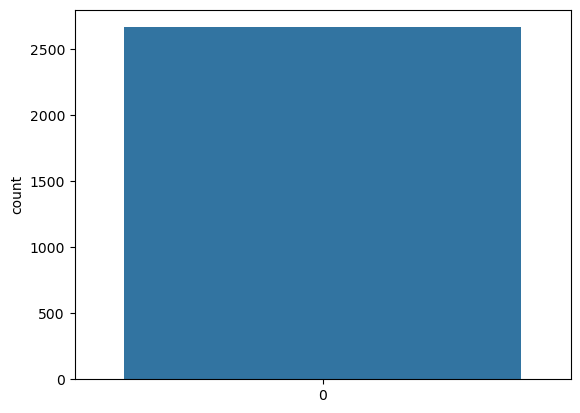

In [32]:
# converts 2d array to 1d array
# the minority class is 386 and 
y_train_1darray = np.ravel(y_train)
print(np.bincount(y_train_1darray))
sns.countplot(y_train_1darray)

In [33]:
# performing smote on training data
sm = SMOTE(sampling_strategy={1:772}, random_state=0)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [34]:
# converts 2d array to 1d array
# the minority class has now become in the ration of 2:5
y_res_1darray = np.ravel(y_res)
np.bincount(y_res_1darray)

array([2280,  772], dtype=int64)

<AxesSubplot:ylabel='count'>

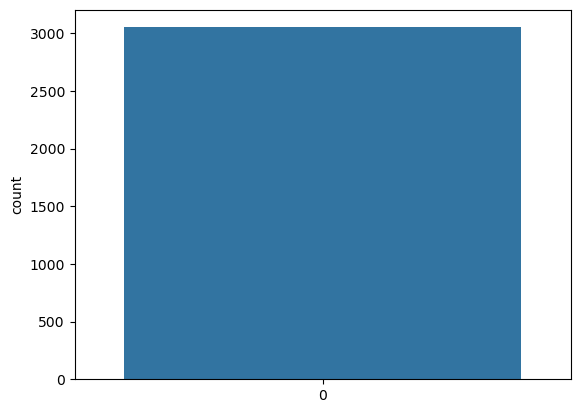

In [35]:
sns.countplot(y_res_1darray)

In [36]:
# now will train the model on the resampled training set using smote
# smote will be done only for training data
# doubled the minority class i.e 1 (churn) from 386 to 772
# Increased the minority class only for training data
# will check on test data after training the model with smote

df_scaled_sm = pd.DataFrame(columns=[['Models','Accuracy_tr','Accuracy_ts','F1-score_1']])
tr_acc_list = []
ts_acc_list = []
ts_f1_list  = []

#Logistic Regression
print('Logistic Regression with SMOTE')
lr_model_sm         = LogisticRegression(random_state= 33)
lr_model_sm.fit(x_res,y_res)
y_pred_train_lr_sm  = lr_model_sm.predict(x_res)#x_train
y_pred_test_lr_sm   = lr_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_lr_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr_sm),2))
print(classification_report(y_test,y_pred_test_lr_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_lr_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr_sm),2))

cl_report_lr_sm = classification_report(y_test,y_pred_test_lr_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_lr_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_lr_sm),2)) 
ts_f1_list.append(np.round(cl_report_lr_sm['1']['f1-score'],2))

#Gaussian NB
print('\n\nGaussian NB')
gnb_model_sm = GaussianNB()
gnb_model_sm.fit(x_res, y_res)
y_pred_train_gnb_sm = gnb_model_sm.predict(x_res)
y_pred_test_gnb_sm  = gnb_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_gnb_sm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb_sm),2))
print(classification_report(y_test,y_pred_test_gnb_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_gnb_sm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_gnb_sm),2))

cl_report_gnb_sm = classification_report(y_test,y_pred_test_gnb_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_gnb_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_gnb_sm),2)) 
ts_f1_list.append(np.round(cl_report_gnb_sm['1']['f1-score'],2))

#Decision Tree
print('\nDecision Tree')
dt_model_sm = DecisionTreeClassifier(random_state= 131)
dt_model_sm.fit(x_res,y_res)
y_pred_train_dt_sm = dt_model_sm.predict(x_res)
y_pred_test_dt_sm  = dt_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_dt_sm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt_sm),2))
print(classification_report(y_test,y_pred_test_dt_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_dt_sm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt_sm),2))

cl_report_dt_sm = classification_report(y_test,y_pred_test_dt_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_dt_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_dt_sm),2)) 
ts_f1_list.append(np.round(cl_report_dt_sm['1']['f1-score'],2))

# Random Forest
print('\nRandom Forest with SMOTE')
rf_model_sm = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf_model_sm.fit(x_res,y_res)
y_pred_train_rf_sm = rf_model_sm.predict(x_res)#x_train
y_pred_test_rf_sm  = rf_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_rf_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf_sm),2))
print(classification_report(y_test,y_pred_test_rf_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_rf_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf_sm),2))

cl_report_rf_sm = classification_report(y_test,y_pred_test_rf_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_rf_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_rf_sm),2)) 
ts_f1_list.append(np.round(cl_report_rf_sm['1']['f1-score'],2))

#xgboost classifier
print('\nXgboost with SMOTE')
xgb_model_sm = XGBClassifier()
xgb_model_sm.fit(x_res,y_res)
y_pred_train_xgb_sm  = xgb_model_sm.predict(x_res)#x_train
y_pred_test_xgb_sm   = xgb_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_xgb_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb_sm),2))
print(classification_report(y_test,y_pred_test_xgb_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_xgb_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb_sm),2))

cl_report_xgb_sm = classification_report(y_test,y_pred_test_xgb_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_xgb_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_xgb_sm),2)) 
ts_f1_list.append(np.round(cl_report_xgb_sm['1']['f1-score'],2))

#SVM
print('\n\nSupport Vector Machine')
svm_model = SVC()
svm_model.fit(x_res,y_res)
y_pred_train_svm_sm = svm_model.predict(x_res)
y_pred_test_svm_sm  = svm_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_svm_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_svm_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_svm_sm),2))
print(classification_report(y_test,y_pred_test_svm_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_svm_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_svm_sm),2))

cl_report_svm_sm = classification_report(y_test,y_pred_test_svm_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_svm_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_svm_sm),2)) 
ts_f1_list.append(np.round(cl_report_svm_sm['1']['f1-score'],2))



Logistic Regression with SMOTE
Training Accuracy =  0.8
Testing Accuracy =  0.84
[[524  46]
 [ 58  39]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       570
           1       0.46      0.40      0.43        97

    accuracy                           0.84       667
   macro avg       0.68      0.66      0.67       667
weighted avg       0.84      0.84      0.84       667

Training ROC AUC score=  0.68
Testing ROC AUC score=  0.66


Gaussian NB
Training Accuracy =  0.84
Testing Accuracy =  0.86
[[505  65]
 [ 29  68]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.91       570
           1       0.51      0.70      0.59        97

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.75       667
weighted avg       0.88      0.86      0.87       667

Training ROC AUC score=  0.79
Testing ROC AUC score=  0.79

Decision Tree
Training Accuracy =  

In [37]:
print('\n\nSmote Score Table')
model_string =['LR', 'NB', 'DT','RF','XGBoost','SVM'] 
df_scaled_sm['Models'] = model_string
df_scaled_sm['Accuracy_tr'] = tr_acc_list
df_scaled_sm['Accuracy_ts'] = ts_acc_list
df_scaled_sm['F1-score_1'] = ts_f1_list
df_scaled_sm



Smote Score Table


,Models,Accuracy_tr,Accuracy_ts,F1-score_1
0,LR,0.80,0.84,0.43
1,NB,0.84,0.86,0.59
2,DT,1.00,0.94,0.82
3,RF,0.95,0.96,0.86
4,XGBoost,1.00,0.98,0.93
5,SVM,0.95,0.93,0.75


# F1 score for all models increased that is performing better with SMOTE

# Hyperparameter tuning

For hyperparameter tuning, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use k-fold cross-validation for hyperparameter tuning. The training set is divided again into k equal-sized samples, 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics (in this case the accuracy) are averaged to produce a single estimator.

It is important to stress that the validation set is used for hyperparameter selection and not for evaluating the final performance of our model.

There are multiple techniques to find the best hyperparameters for a model. The most popular methods are (1) grid search, (2) random search, and (3) bayesian optimization.

We've used Random Search method for Hypermeter Tuning.

# Model Optimization - GridSearchCV

In [38]:
Accu_list_tr = []
Accu_list_ts = []
F1_churn_ts = []
F1_nonchurn_ts = []
df_final1 = pd.DataFrame(columns=['Models','TR_Accu','TS_Accu','TS_churn_f1_score','TS_nonchurn_f1_score'])

In [39]:
X = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train

(3333, 18)
(3333, 1)
(2666, 18)
(667, 18)
(2666, 1)
(667, 1)


array([[ 0.97787485, -0.61839626, -0.59175986, ..., -0.19483061,
         0.84311087, -0.13996744],
       [-0.20255123, -0.61839626, -0.59175986, ...,  0.61789834,
         1.02887115,  0.74568906],
       [-0.32812847, -0.61839626, -0.59175986, ...,  0.21153386,
        -0.04588472, -0.37995178],
       ...,
       [ 0.40021953, -0.61839626, -0.59175986, ...,  1.83699177,
         1.59942056,  0.18953487],
       [ 0.27464229,  1.6170861 ,  0.5772914 , ..., -0.60119509,
         0.06026401,  0.09715995],
       [-0.10208944, -0.61839626, -0.59175986, ..., -1.00755957,
         0.27256146,  0.37904632]])

# GridsearchCV - SVM

In [40]:
from sklearn.model_selection import KFold,cross_val_score

fold = KFold(n_splits=5)
results = cross_val_score(model,x,y,cv=fold)
results.min(), results.max()


NameError: name 'model' is not defined

In [ ]:
results.std()

In [ ]:
results.mean()

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold

param = {"C":[50,80,100,120,150],'kernel':["rbf","sigmoid","poly"]}

svm_model = SVC(random_state=42)
svm_model_tweaked = GridSearchCV(svm_model,param_grid=param,cv=KFold(n_splits=5))
svm_model_tweaked.fit(x_train,y_train)
print(svm_model_tweaked.best_params_)
print(svm_model_tweaked.best_score_)

In [ ]:
# training the standardized model with gridsearch params
svm_model_gsc = SVC(kernel="rbf", C=150)
svm_model_gsc.fit(x_train,y_train)
y_pred_train_svm_gsc = svm_model_gsc.predict(x_train)
y_pred_test_svm_gsc  = svm_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_svm_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_svm_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_svm_gsc))
print(classification_report(y_test,y_pred_test_svm_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_svm_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_svm_gsc = classification_report(y_test,y_pred_test_svm_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_svm_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test,y_pred_test_svm_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_svm_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_svm_gsc['0']['f1-score'],2))

#print(Accu_list_tr)
#print(Accu_list_ts)
#print(F1_list_ts)

In [ ]:
# k-fold cross validation for SVM
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_svm = cross_val_score(svm_model_gsc, x_train, y_train, cv=kfold)
print("Training Accuracy\n", tr_results_kfold_svm)
Accu_kf_tr = [np.round(item,2) for item in tr_results_kfold_svm]

ts_results_kfold_svm = cross_val_score(svm_model_gsc, x_test, y_test, cv=kfold)
print("\nTesting Accuracy\n",ts_results_kfold_svm)
Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_svm]

ts_results_kfold_svm_f1 = cross_val_score(svm_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_svm_f1)
f1_kf_ts = Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_svm_f1]

df_kfold_svm = pd.DataFrame()
df_kfold_svm = pd.DataFrame([Accu_kf_tr,Accu_kf_ts,f1_kf_ts], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_svm.insert(0,'SVM', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_svm

# GridsearchCV - Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model_tweaked = GridSearchCV(estimator= rf_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'n_estimators':[50,80,100,120,150],
                                                                    'min_samples_split' : [2,3,4,5]                                                                     
                                                                   })
rf_model_tweaked.fit(x_train,y_train)
print(rf_model_tweaked.best_params_)
print(rf_model_tweaked.best_score_)

In [ ]:
# training the standardized model with gridsearch params
rf_model_gsc = RandomForestClassifier(n_estimators=150, max_depth= 7, criterion='gini', min_samples_split=5)
rf_model_gsc.fit(x_train,y_train)
y_pred_train_rf_gsc = rf_model_gsc.predict(x_train)
y_pred_test_rf_gsc  = rf_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_rf_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_rf_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_rf_gsc))
print(classification_report(y_test,y_pred_test_rf_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_rf_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_rf_gsc = classification_report(y_test,y_pred_test_rf_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_rf_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test,y_pred_test_rf_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_rf_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_rf_gsc['0']['f1-score'],2))

#print(Accu_list_tr)
#print(Accu_list_ts)
#print(F1_list_ts)

In [ ]:
# k-fold cross validation for random forest
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_rf = cross_val_score(rf_model_gsc, x_train, y_train, cv=kfold)
print("Training Accuracy\n", tr_results_kfold_rf)
Accu_kf_tr = [np.round(item,2) for item in tr_results_kfold_rf]

ts_results_kfold_rf = cross_val_score(rf_model_gsc, x_test, y_test, cv=kfold)
print("\nTesting Accuracy\n",ts_results_kfold_rf)
Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_rf]

ts_results_kfold_rf_f1 = cross_val_score(rf_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_rf_f1)
f1_kf_ts = Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_rf_f1]

df_kfold_rf = pd.DataFrame()
df_kfold_rf = pd.DataFrame([Accu_kf_tr,Accu_kf_ts,f1_kf_ts], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_rf.insert(0,'Random_Forest', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_rf

# GridSearchCV - XGBoost

In [ ]:
#training the Smote model with Gridsearch CV for XGBoost
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.03], # `eta` value
              'max_depth': [3,4,5,6,7,8],
              'n_estimators': [10, 50, 100, 150], #number of trees, change it to 100 for better results
             }

xgb_model = XGBClassifier()
xgb_model_tweaked = GridSearchCV(estimator= xgb_model, param_grid= parameters)
xgb_model_tweaked.fit(x_train,y_train)
print(xgb_model_tweaked.best_params_)
print(xgb_model_tweaked.best_score_)

In [ ]:
# training the standardized model with gridsearch params
xgb_model_gsc = XGBClassifier(n_estimators=100, max_depth= 3, learning_rate=0.05,  nthread = 4)
xgb_model_gsc.fit(x_train,y_train)
y_pred_train_xgb_gsc = xgb_model_gsc.predict(x_train)
y_pred_test_xgb_gsc  = xgb_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_xgb_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_xgb_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_xgb_gsc))
print(classification_report(y_test,y_pred_test_xgb_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_xgb_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_xgb_gsc = classification_report(y_test,y_pred_test_xgb_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_xgb_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test,y_pred_test_xgb_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_xgb_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_xgb_gsc['0']['f1-score'],2))


In [ ]:
# k-fold cross validation for XGBoost
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_xgb = cross_val_score(xgb_model_gsc, x_train, y_train, cv=kfold)
print("\n\nTraining Accuracy\n ",tr_results_kfold_xgb,"\n\n")
Accu_kf_tr_xgb = [np.round(item,2) for item in tr_results_kfold_xgb]

ts_results_kfold_xgb = cross_val_score(xgb_model_gsc, x_test, y_test, cv=kfold)
print("\n\nTesting Accuracy\n ",ts_results_kfold_rf)
Accu_kf_ts_xgb = [np.round(item,2) for item in ts_results_kfold_xgb]

ts_results_kfold_xgb_f1 = cross_val_score(xgb_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_xgb_f1)
f1_kf_ts_xgb = [np.round(item,2) for item in ts_results_kfold_xgb_f1]


df_kfold_xgb = pd.DataFrame()
df_kfold_xgb = pd.DataFrame([Accu_kf_tr_xgb,Accu_kf_ts_xgb,f1_kf_ts_xgb], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_xgb.insert(0,'XGBoost', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_xgb

# GridSearchCV - Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=52)
dt_model_tweaked = GridSearchCV(estimator= dt_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'min_samples_split' : [2,3,4,5]                                                                                                   
                                                                   })
dt_model_tweaked.fit(x_train,y_train)
print(dt_model_tweaked.best_params_)
print(dt_model_tweaked.best_score_)

In [ ]:
#training Decision Tree with Gridsearch CV best params
dt_model_gsc = DecisionTreeClassifier(max_depth= 5, criterion ='gini', min_samples_split=2, random_state=63)
dt_model_gsc.fit(x_train,y_train)
y_pred_train_dt_gsc = dt_model_gsc.predict(x_train)
y_pred_test_dt_gsc  = dt_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_dt_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_dt_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_dt_gsc))
print(classification_report(y_test,y_pred_test_dt_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_dt_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_dt_gsc = classification_report(y_test,y_pred_test_dt_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_dt_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test, y_pred_test_dt_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_dt_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_dt_gsc['0']['f1-score'],2))

In [ ]:
# k-fold cross validation for Decision Tree
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_dt = cross_val_score(dt_model_gsc, x_train, y_train, cv=kfold)
print("Training Accuracy\n", tr_results_kfold_dt)
Accu_kf_tr_dt = [np.round(item,2) for item in tr_results_kfold_dt]

ts_results_kfold_dt = cross_val_score(dt_model_gsc, x_test, y_test, cv=kfold)
print("\nTesting Accuracy\n",ts_results_kfold_rf)
Accu_kf_ts_dt = [np.round(item,2) for item in ts_results_kfold_dt] 

ts_results_kfold_dt_f1 = cross_val_score(dt_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_dt_f1)
f1_kf_ts_dt = [np.round(item,2) for item in ts_results_kfold_dt_f1] 

df_kfold_dt = pd.DataFrame()
df_kfold_dt = pd.DataFrame([Accu_kf_tr_dt,Accu_kf_ts_dt,f1_kf_ts_dt], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_dt.insert(0,'Decision Tree', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_dt

# Inferences

In [ ]:
print('\n\nGridsearchCV Score Table')

model_string =['SVM','RF','XGBoost','DT'] 

#print(Accu_list_tr)

df_final1['Models'] = model_string
df_final1['TR_Accu'] = Accu_list_tr
df_final1['TS_Accu']  = Accu_list_ts
df_final1['TS_churn_f1_score']   = F1_churn_ts
df_final1['TS_nonchurn_f1_score']   = F1_nonchurn_ts
df_final1

As shown above, 818 observations of the testing data were correctly classified by the model (725 true negatives and 93 true positives). On the contrary, we can observe 16 misclassifications (0 false positives and 16 false negatives).

As we can observe, hyperparameter tuning has barely increased the accuracy of the model.

In [ ]:
df

In [ ]:
df.columns

# Conclusions


We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 6 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Gradient Boosting Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 98.3%.

# Pickle File

In [ ]:
import pickle

In [ ]:
# creating a pickle file
filename = 'telecom_churn_trained_model.sav'
pickle.dump(xgb_model_gsc,open(filename, 'wb'))

In [ ]:
# loading the saved model 
loaded_model = pickle.load(open('telecom_churn_trained_model.sav','rb'))